<a href="https://colab.research.google.com/github/Abhiruchi37/Stock-Market-Prediction/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [ ]:
# Load the dataset
df = pd.read_csv('INFY.csv')

In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,2021-04-29,INFY,EQ,1356.00,1368.00,1369.00,1351.40,1356.00,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785


In [ ]:
#Describe dataset
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14,1.118490e+05,1.574596e+06,0.536366
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14,9.020307e+04,2.269940e+06,0.179496
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,1.350000e+03,4.352000e+03,0.045800
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14,5.922600e+04,4.074360e+05,0.455700
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14,9.025650e+04,8.011600e+05,0.579900
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14,1.354770e+05,1.986846e+06,0.663700
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


In [ ]:
# Display the first few rows of the dataset
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [ ]:
#datatypes
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

<Axes: >

<Figure size 2000x800 with 0 Axes>

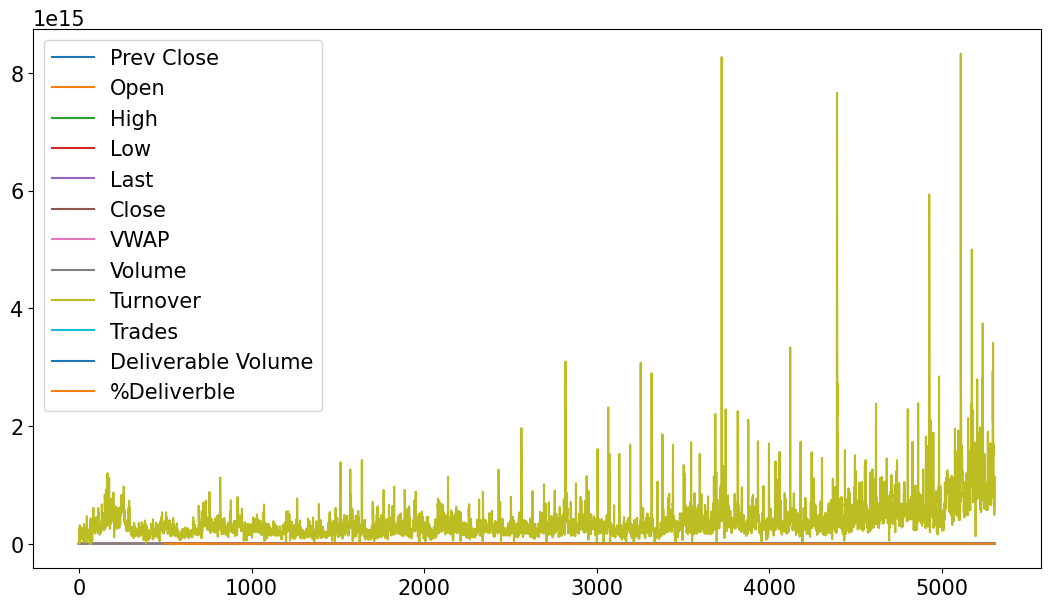

In [ ]:
#plot
plt.rcParams['figure.figsize'] = [13, 7]
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
df.plot()

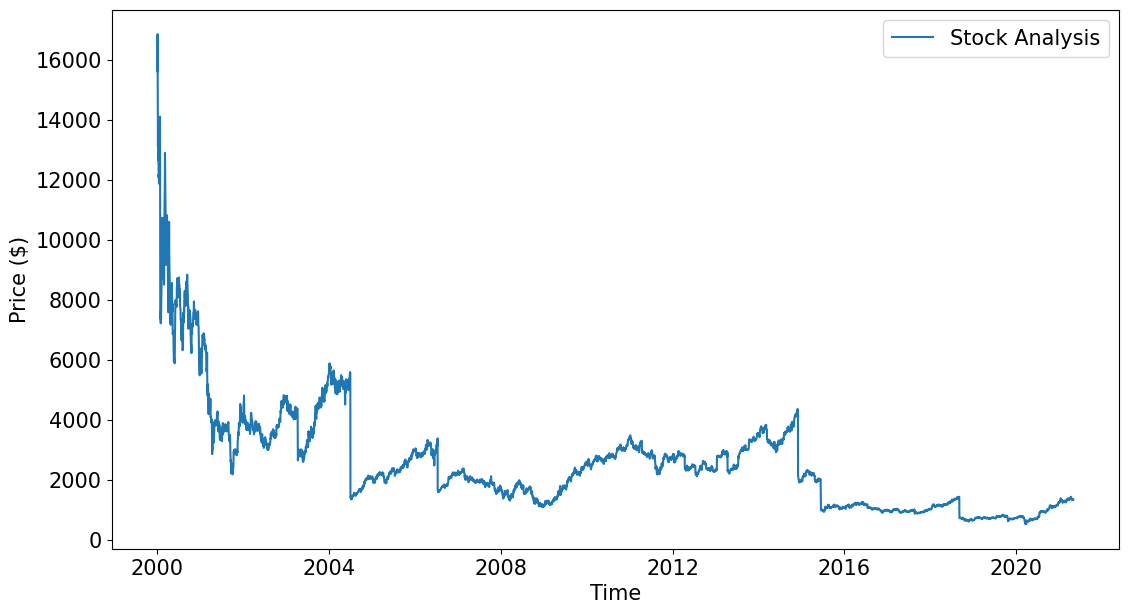

In [ ]:
x = df['Close']
plt.plot(x,label="Stock Analysis")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [ ]:
# Data Preprocessing
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:


# Calculate daily returns
df['Returns'] = df['Close'].pct_change(1).dropna()


In [ ]:
returns[0:10]

Date
2000-01-04    0.078764
2000-01-05   -0.079999
2000-01-06   -0.080000
2000-01-07   -0.080000
2000-01-10    0.048135
2000-01-11   -0.079998
2000-01-12    0.033247
2000-01-13   -0.075469
2000-01-14    0.007096
2000-01-17   -0.025090
Name: Close, dtype: float64

In [ ]:
(x[1]-x[0])/x[0]

0.0787637918234647

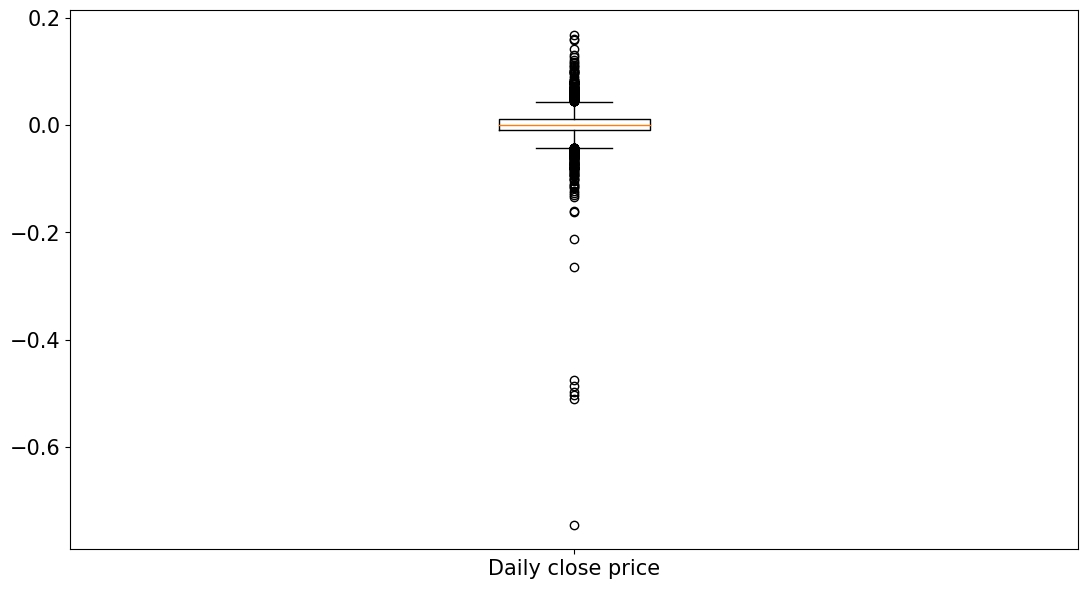

In [ ]:
plt.boxplot(returns,labels=["Daily close price"])
plt.show() #the IQR is narrow, this is called fat tails that is common in stock analysis


In [ ]:
returns.describe()

count    5305.000000
mean        0.000119
std         0.030042
min        -0.744972
25%        -0.010148
50%         0.000426
75%         0.011370
max         0.167851
Name: Close, dtype: float64

In [ ]:
np.mean(returns)

0.00011923645200126623

In [ ]:
np.median(returns)


0.00042610450773716835

In [ ]:
np.mod(returns,x)

Date
2000-01-03             NaN
2000-01-04        0.078764
2000-01-05    15507.370001
2000-01-06    14266.770000
2000-01-07    13125.420000
                  ...     
2021-04-26        0.007310
2021-04-27        0.003684
2021-04-28        0.005562
2021-04-29        0.000258
2021-04-30     1354.348525
Name: Close, Length: 5306, dtype: float64

In [ ]:
np.std(returns) #more than mean due to outliers

0.030039211715101523

In [ ]:
np.quantile(returns,0.5)

0.00042610450773716835

In [ ]:
skew(returns) #negative thus distribution is symmetrical; tail is on left


-7.221173156847479

In [ ]:
skewtest(returns)

SkewtestResult(statistic=-70.02213595806154, pvalue=0.0)

In [ ]:
kurtosis(returns)

143.2213143132056

In [ ]:

kurtosistest(returns)


KurtosistestResult(statistic=47.342247387678796, pvalue=0.0)

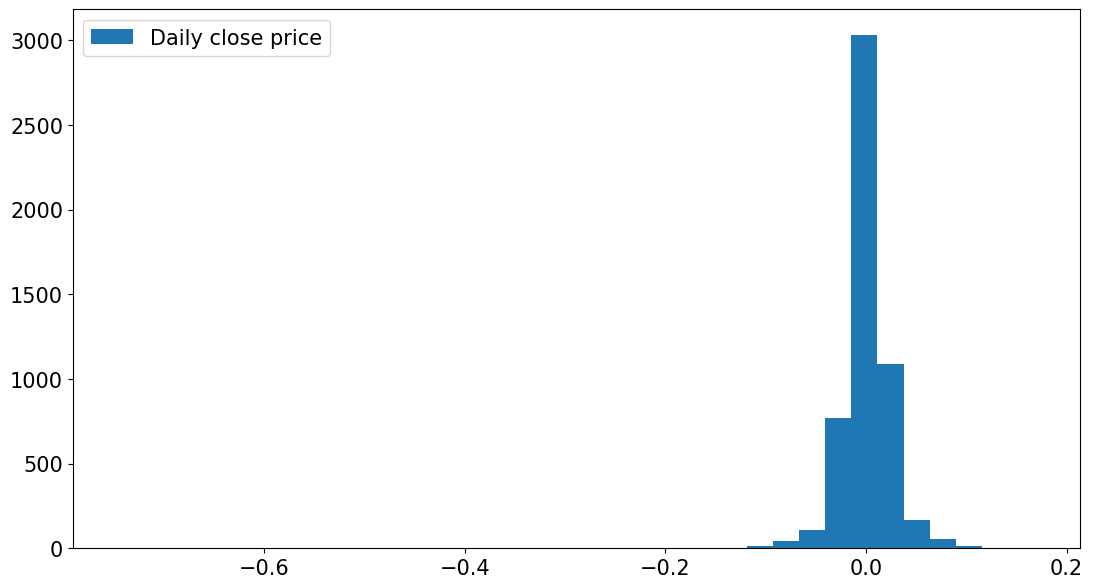

In [ ]:

plt.hist(returns,bins="rice",label="Daily close price")
plt.legend()
plt.show()

In [ ]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

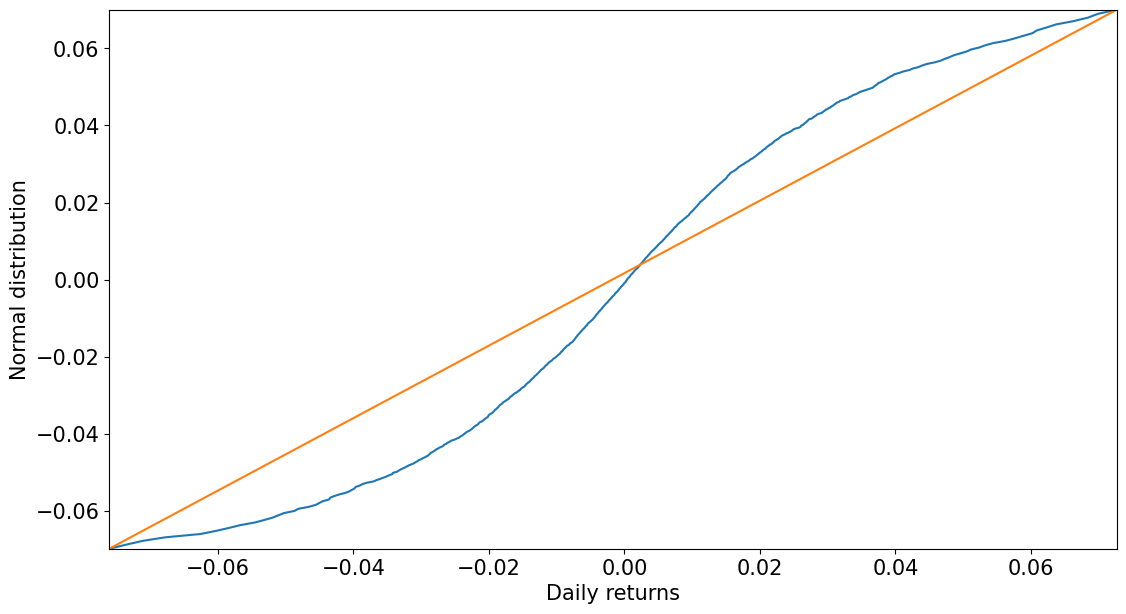

In [ ]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()
#straight line- what we expect amd curved line-what we get;
#quantiles of dataset aren’t comparable with the quantiles of a normal distribution
#thus'returns' isnt normally distributed

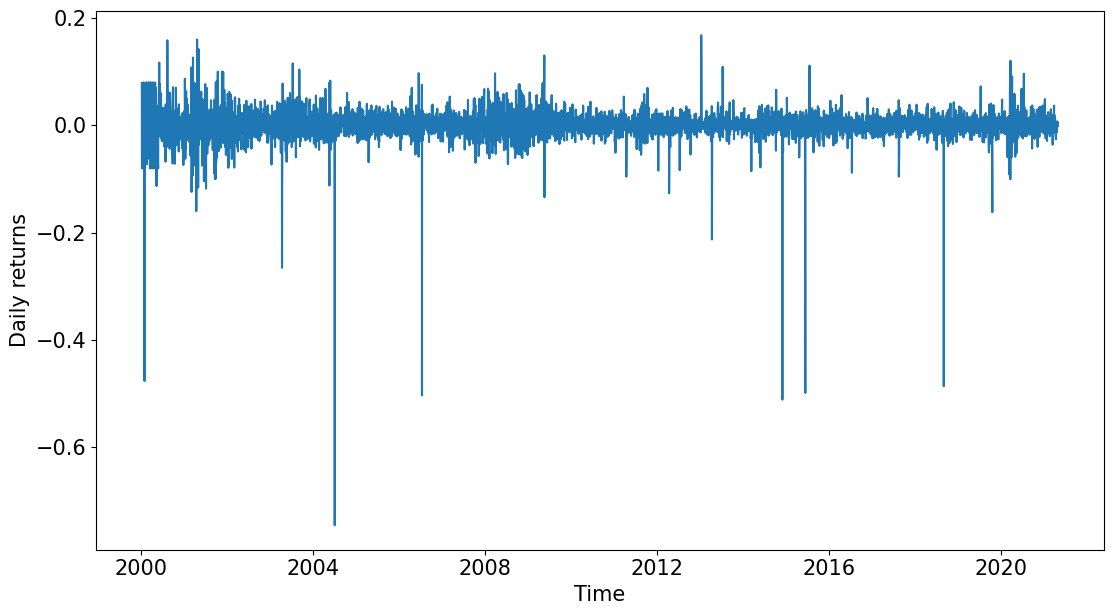

In [ ]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()
#volatility clustering-common in stock analysis; std changes and time series also changes

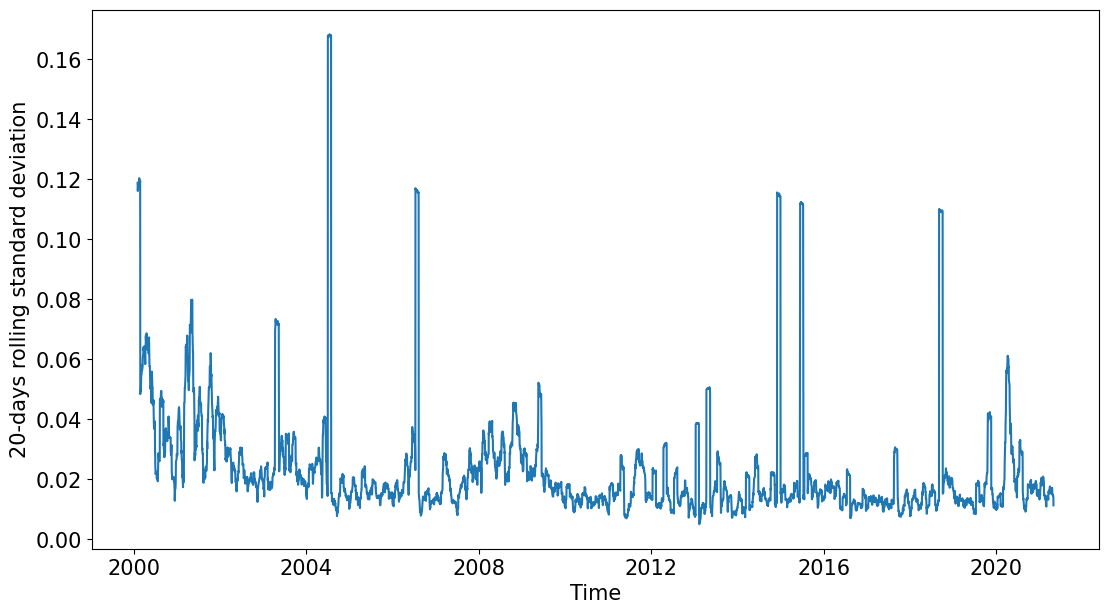

In [ ]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()
#spikes and oscillations present thus the ouliers generated cant be ignored

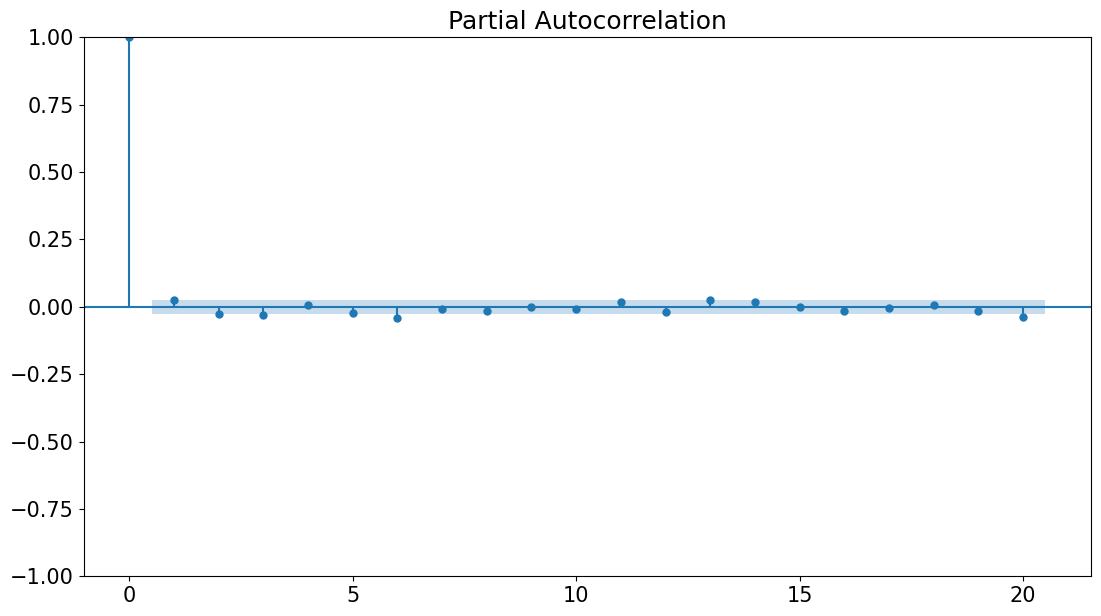

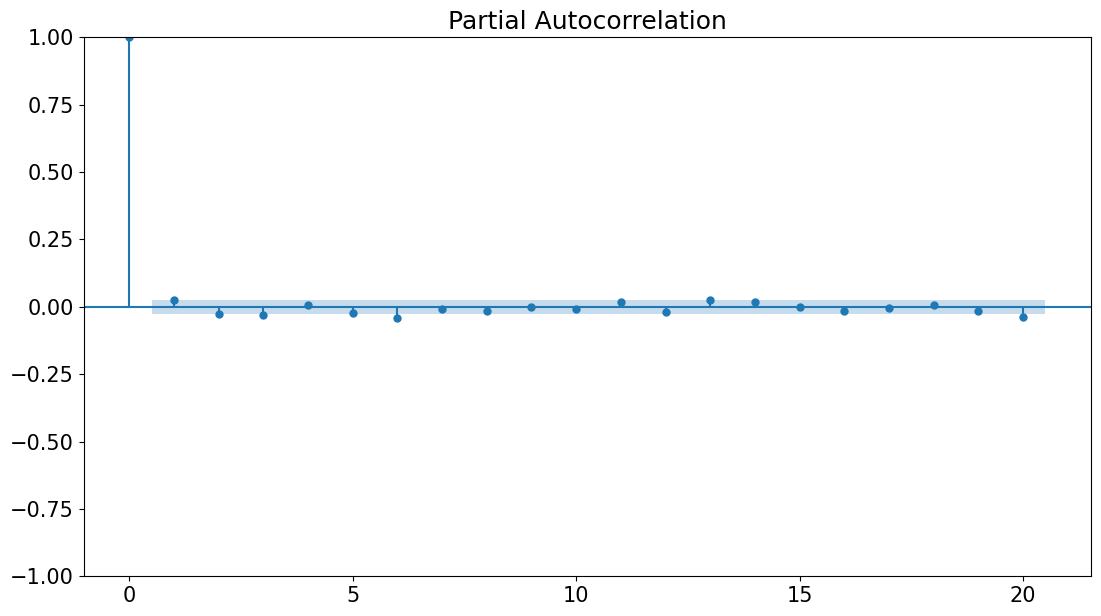

In [ ]:
plot_pacf(returns,lags=20)

In [ ]:
# Drop NaN values
df = df.dropna()

In [ ]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Returns'


In [ ]:
# Create feature matrix X and target vector y
X = df[features]
y = df[target]

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]


In [ ]:
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00037745691094955263


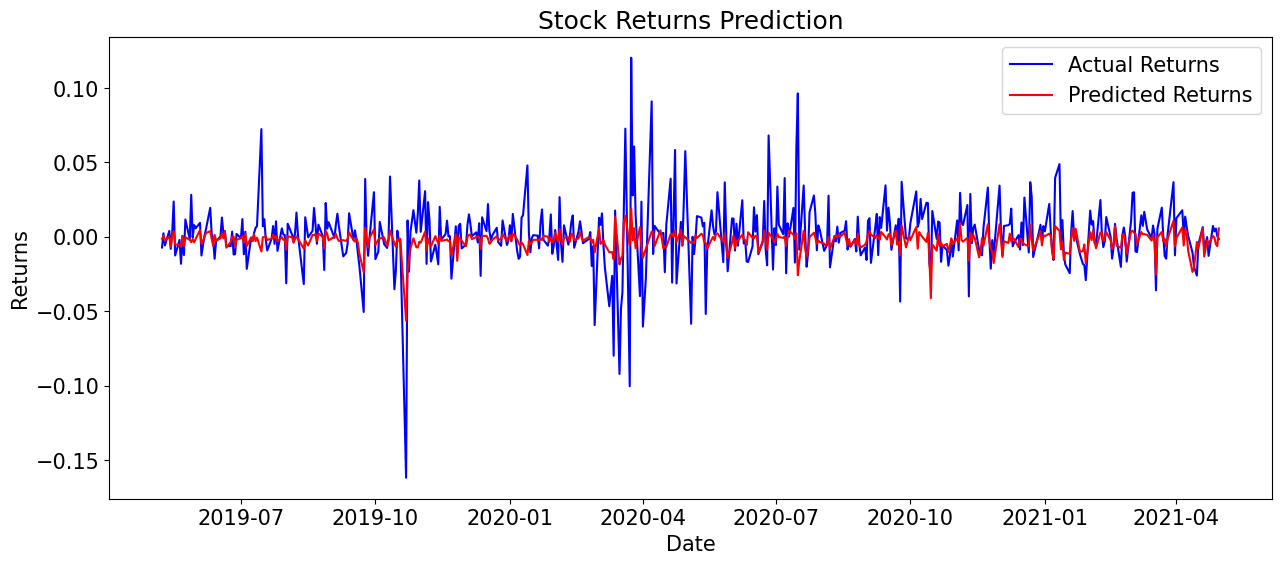

In [ ]:
# Visualize the predictions
plt.figure(figsize=(15, 6))
plt.plot(df.index[train_size:], test_data['Returns'], label='Actual Returns', color='blue')
plt.plot(df.index[train_size:], y_pred, label='Predicted Returns', color='red')
plt.title('Stock Returns Prediction')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

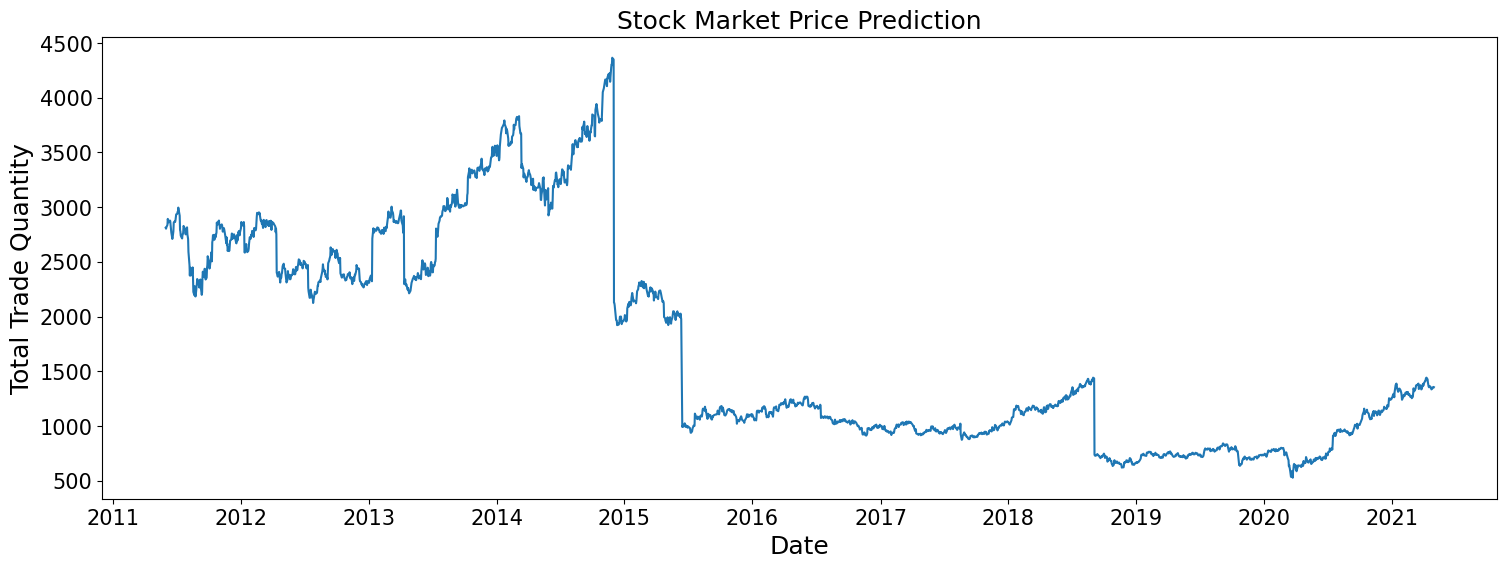

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

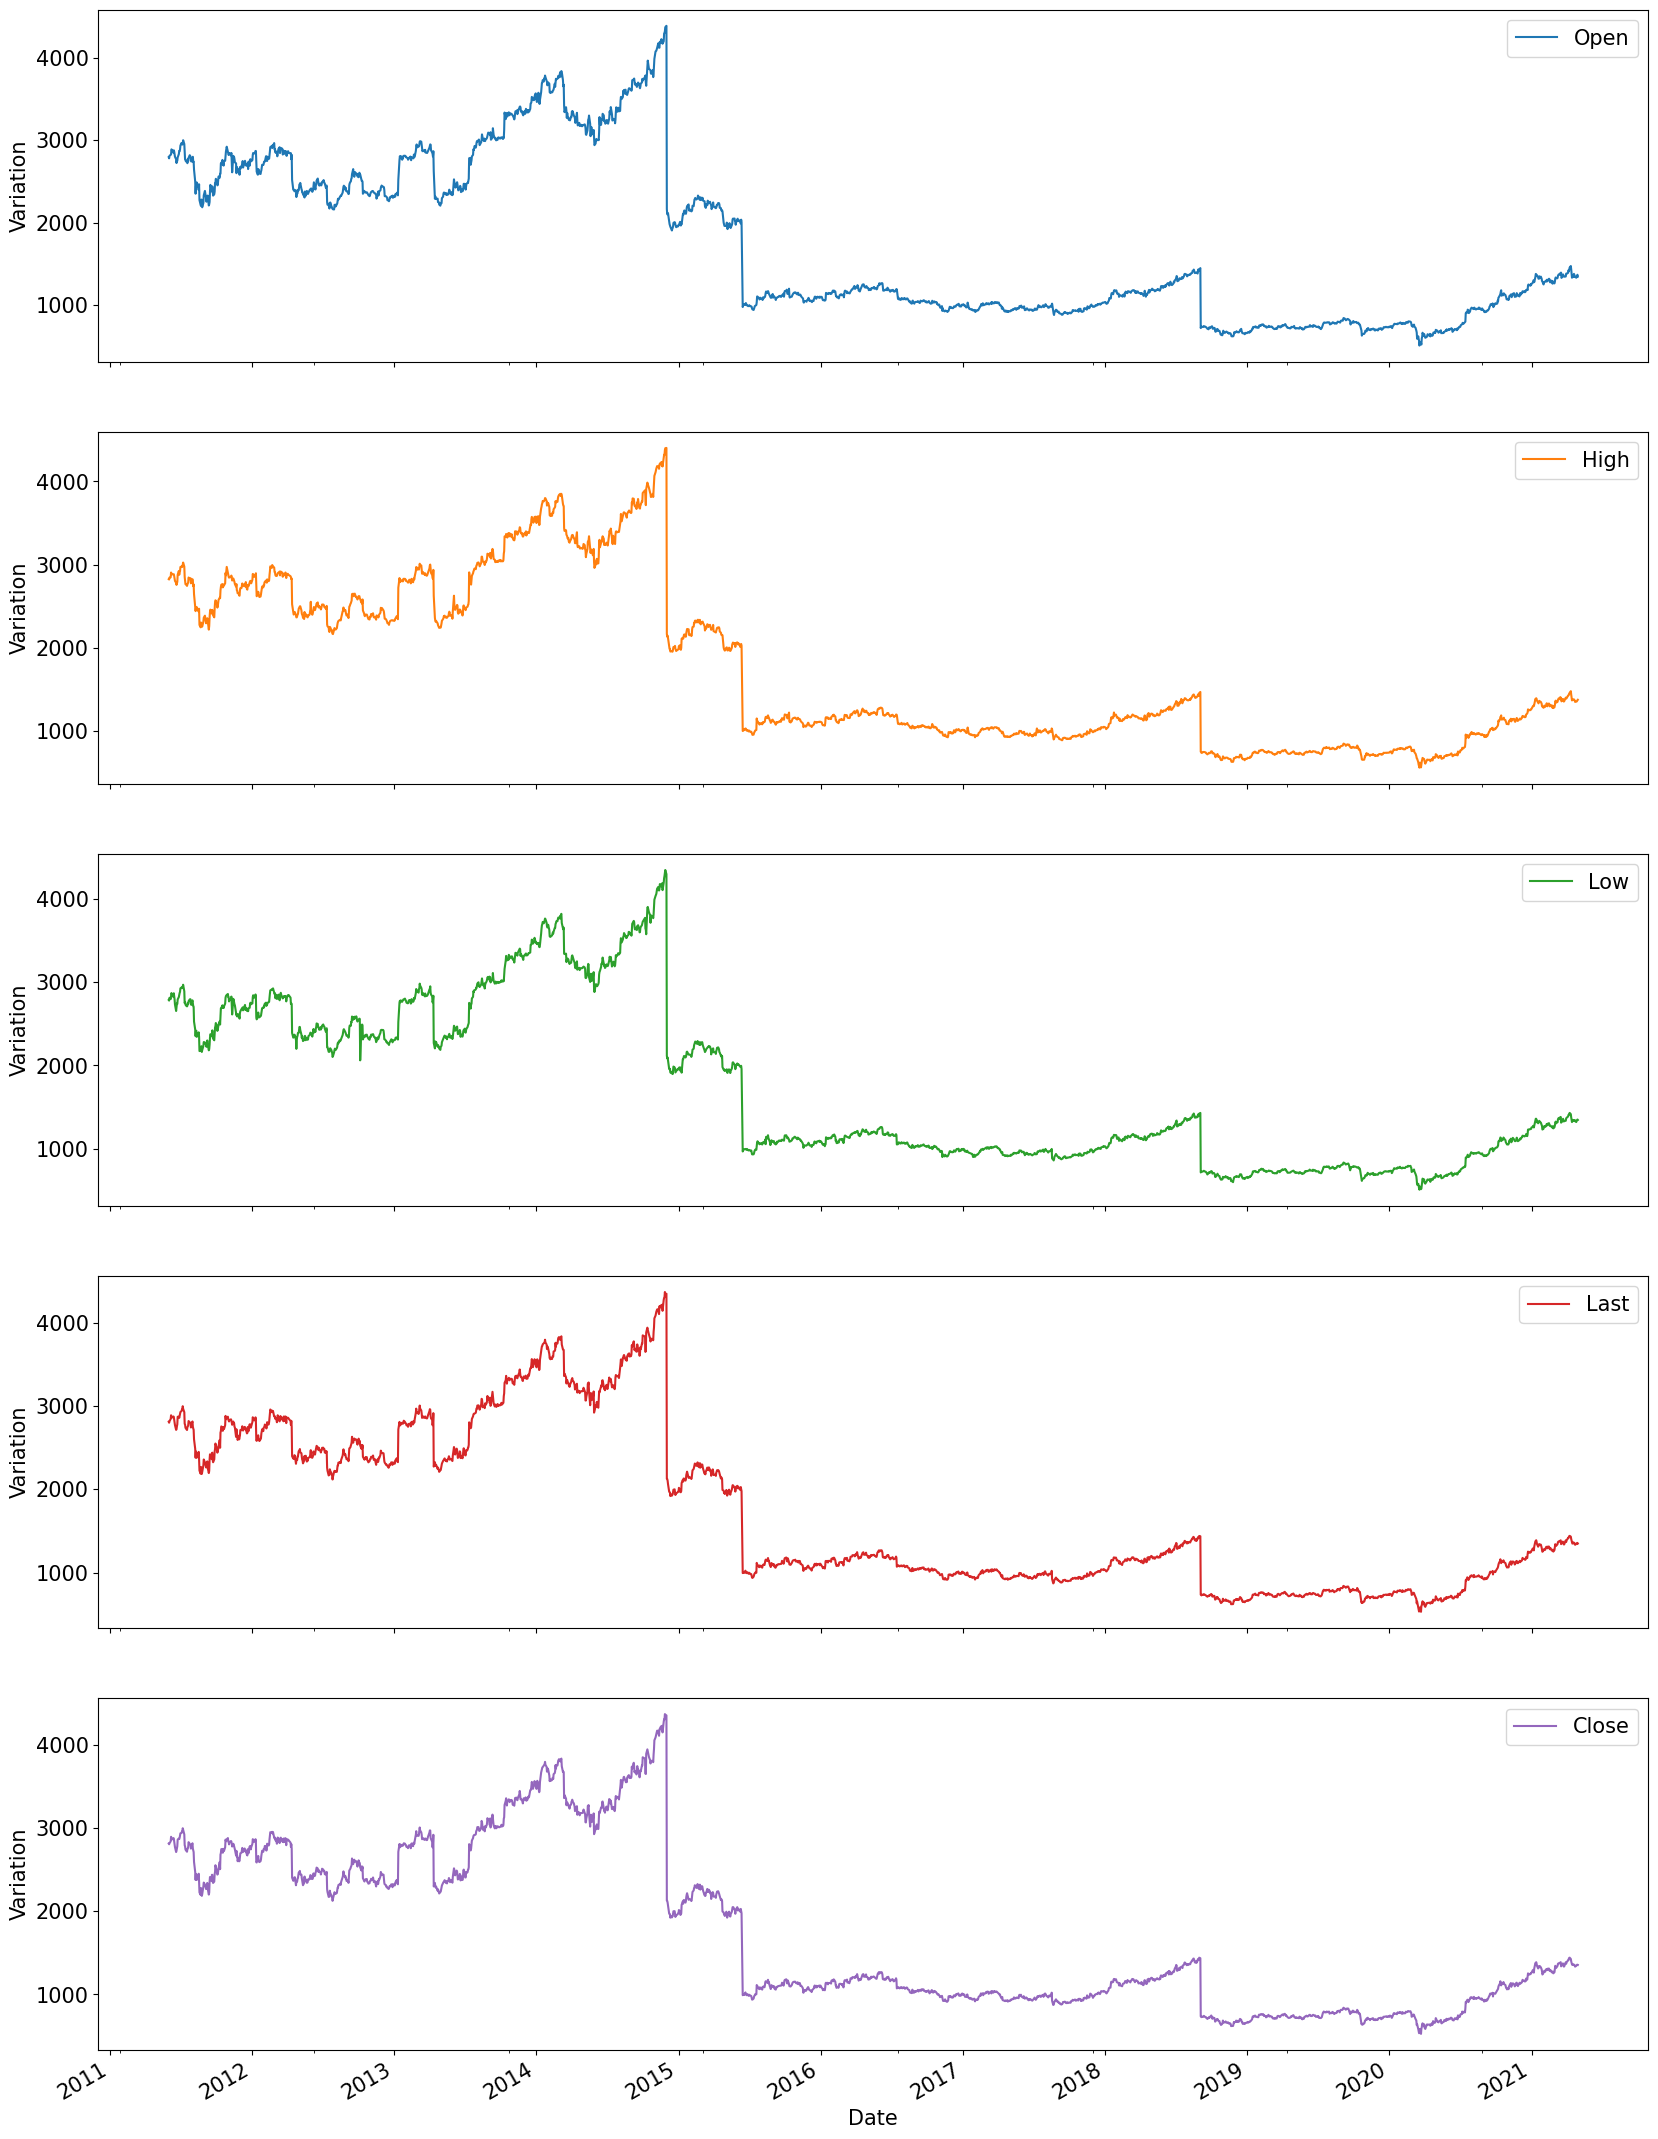

In [ ]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)
for i in axes:
    i.set_ylabel('Variation')